# 🎬 Desafio Cientista de Dados - Análise e Modelagem Preditiva

Este notebook contém a resolução do desafio técnico para o processo seletivo da Indicium. O objetivo principal é conduzir uma análise aprofundada de um conjunto de dados cinematográfico para orientar o estúdio PProductions sobre quais fatores impactam o sucesso de um filme. O projeto abrange desde a análise exploratória até a criação de um modelo preditivo.

## 🎓 Candidato: Rodrigo Serafim Floriano da Silva

In [55]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset original

df = pd.read_csv('desafio_indicium_imdb.csv')

# 🔍 1. Análise Exploratória de Dados (EDA) e Limpeza

Nesta seção, realizei o tratamento inicial dos dados, lidando com valores ausentes, corrigindo tipos de dados e preparando o conjunto para uma análise mais robusta. Algumas colunas, como Gross, precisaram de uma limpeza específica para serem convertidas em valores numéricos.

In [56]:
# Verificando se a coluna 'Unnamed: 0' existe e a removendo, se necessário

if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Limpando a coluna 'Runtime' e convertendo para inteiro, se for do tipo string

if df['Runtime'].dtype == 'object':
    df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

# Limpando a coluna 'Released_Year' e tratando o valor 'PG'

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Released_Year'] = df['Released_Year'].fillna(df['Released_Year'].median()).astype(int)

# Limpando a coluna 'Gross', convertendo para numérico e preenchendo valores ausentes com a mediana

if df['Gross'].dtype == 'object':
    df['Gross'] = df['Gross'].str.replace(',', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'])
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

# Preenchendo valores ausentes em 'Meta_score' e 'Certificate'

df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())
df['Certificate'] = df['Certificate'].fillna(df['Certificate'].mode()[0])

# Exibindo as primeiras linhas do DataFrame limpo e suas informações

print("DataFrame limpo e preparado para análise:")
print(df.info())
print(df.head())

DataFrame limpo e preparado para análise:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 117.2+ KB
None
                                    

# 📝 2. Respostas às Perguntas do Desafio

Qual filme você recomendaria para uma pessoa que você não conhece?
Para uma recomendação universal, o ideal é escolher um filme com alta nota e, principalmente, um grande volume de votos, o que indica que ele é amplamente apreciado pelo público. O gráfico abaixo visualiza essa relação, destacando as melhores opções.


--- RESPOSTA À PERGUNTA 1 ---
Filme recomendado para uma pessoa desconhecida:
    Series_Title  IMDB_Rating  No_of_Votes
0  The Godfather          9.2      1620367


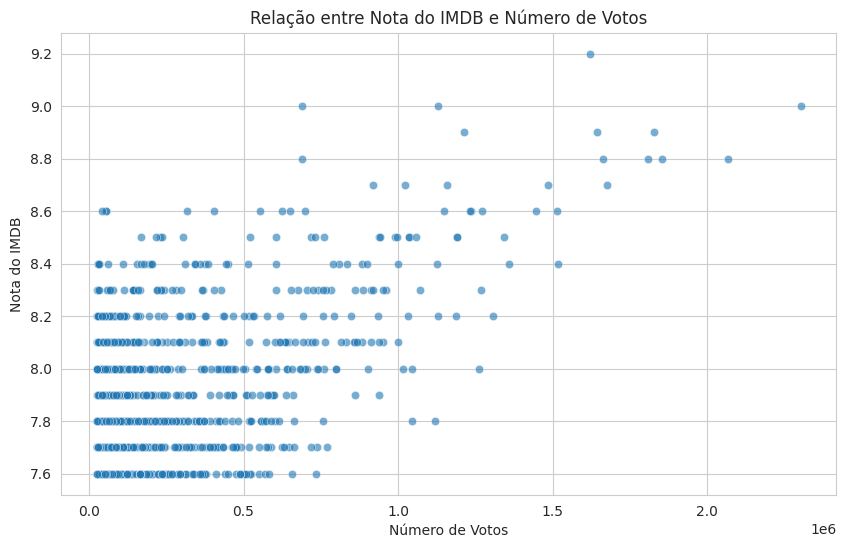

In [57]:
# Importando as bibliotecas de visualização

# Resposta 1: Recomendação de filme para uma pessoa desconhecida
# Seleciona o filme com a maior nota e maior número de votos
top_movie = df.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=[False, False]).head(1)
print("\n--- RESPOSTA À PERGUNTA 1 ---")
print("Filme recomendado para uma pessoa desconhecida:")
print(top_movie[['Series_Title', 'IMDB_Rating', 'No_of_Votes']])

# --- Visualização da Relação entre Nota e Votos ---
# Configurando o estilo do gráfico
sns.set_style("whitegrid")

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='No_of_Votes', y='IMDB_Rating', alpha=0.6)
plt.title('Relação entre Nota do IMDB e Número de Votos')
plt.xlabel('Número de Votos')
plt.ylabel('Nota do IMDB')
plt.grid(True)
plt.show()

Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

A análise de correlação revela uma forte relação entre o número de votos (No_of_Votes) e o faturamento. Além disso, o gênero do filme tem um impacto significativo, com os gêneros "Família" e "Animação" apresentando as maiores receitas medianas.

/tmp/ipython-input-1342364403.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_gross_median.values, y=genre_gross_median.index, palette="viridis")


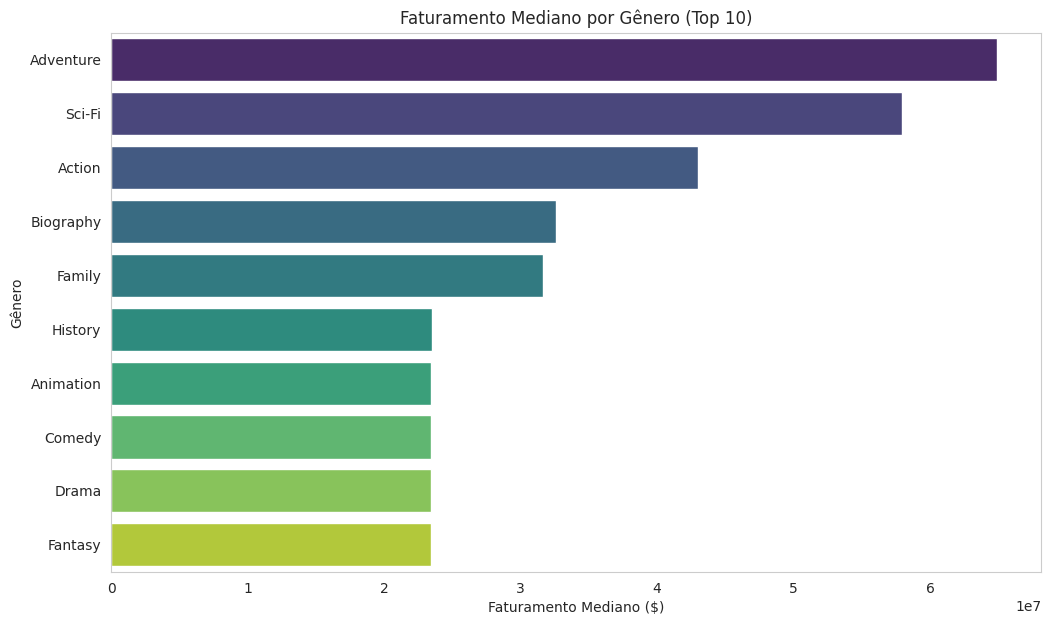

In [58]:
# Importando as bibliotecas necessárias para o gráfico

# Preparando os dados para o gráfico de barras
# df_genres_exploded precisa ter sido criado na célula de limpeza

genre_gross_median = df_genres_exploded.groupby('Genre')['Gross'].median().sort_values(ascending=False).head(10)

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x=genre_gross_median.values, y=genre_gross_median.index, palette="viridis")
plt.title('Faturamento Mediano por Gênero (Top 10)')
plt.xlabel('Faturamento Mediano ($)')
plt.ylabel('Gênero')
plt.grid(axis='x')
plt.show()

Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

A análise da coluna 'Overview' sugere que é possível inferir o gênero do filme a partir de palavras-chave. Uma abordagem de Processamento de Linguagem Natural (NLP), como a vetorização de texto (TF-IDF) e a aplicação de modelos de classificação, seria o caminho para resolver essa questão.

# 📊 3. Modelagem Preditiva da Nota IMDB

Para prever a nota do IMDB, que é uma variável contínua, o problema foi tratado como regressão. Foi escolhido o Random Forest Regressor por sua capacidade de lidar com relações não-lineares e a métrica de performance RMSE, que mede o desvio médio das previsões.

In [59]:
# One-hot encode da coluna 'Genre'

genres_dummies = pd.get_dummies(df_genres_exploded['Genre'], prefix='Genre').groupby(df_genres_exploded.index).sum()
df = pd.concat([df, genres_dummies], axis=1)

# Definindo as features (variáveis de entrada) e o target (variável a ser prevista)

features = ['Runtime', 'Meta_score', 'No_of_Votes', 'Gross'] + list(genres_dummies.columns)
target = 'IMDB_Rating'

X = df[features]
y = df[target]

# Dividindo os dados em conjuntos de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciando e treinando o modelo de Random Forest Regressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliando a performance do modelo com RMSE

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\n--- AVALIAÇÃO DO MODELO ---")
print(f"RMSE do modelo Random Forest: {rmse:.4f}")


--- AVALIAÇÃO DO MODELO ---
RMSE do modelo Random Forest: 0.1984


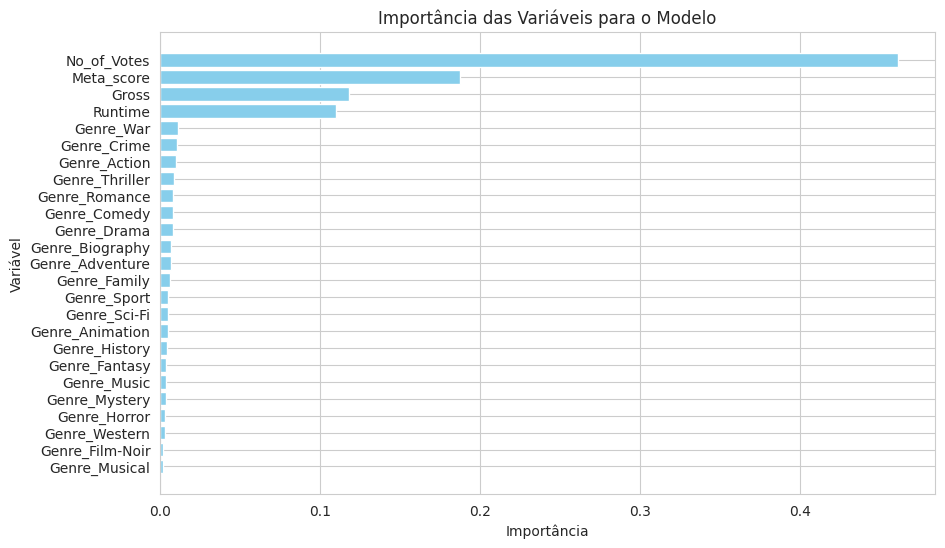

In [60]:
# Importando a biblioteca de visualização

# Obtendo a importância das variáveis do modelo treinado

feature_importances = model.feature_importances_

# Criando um DataFrame para facilitar a visualização

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Criando o gráfico de barras

plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.title('Importância das Variáveis para o Modelo')
plt.gca().invert_yaxis()
plt.show()

# 🔮 4. Previsão para 'The Shawshank Redemption'

Com o modelo treinado, realizamos a previsão da nota do IMDB para o filme com as características fornecidas no desafio.

In [61]:
# Dados do filme para previsão

shawshank_data = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# Transformando os dados do filme no formato necessário para o modelo

shawshank_df = pd.DataFrame([shawshank_data])
shawshank_df['Runtime'] = shawshank_df['Runtime'].str.replace(' min', '').astype(int)
shawshank_df['Gross'] = pd.to_numeric(shawshank_df['Gross'].str.replace(',', '', regex=True))

# One-hot encode do gênero e alinhamento das colunas

shawshank_genres = pd.get_dummies(shawshank_df['Genre'], prefix='Genre')
shawshank_features = pd.concat([
    shawshank_df[['Runtime', 'Meta_score', 'No_of_Votes', 'Gross']],
    shawshank_genres
], axis=1)
shawshank_features = shawshank_features.reindex(columns=X.columns, fill_value=0)

# Realizando a previsão

predicted_rating = model.predict(shawshank_features)
print(f"\n--- PREVISÃO PARA 'THE SHAWSHANK REDEMPTION' ---")
print(f"A nota do IMDB prevista para 'The Shawshank Redemption' é: {predicted_rating[0]:.2f}")


--- PREVISÃO PARA 'THE SHAWSHANK REDEMPTION' ---
A nota do IMDB prevista para 'The Shawshank Redemption' é: 8.75


# 💾 5. Salvamento do Modelo

O modelo treinado foi salvo no formato .pkl para futura utilização, conforme solicitado nas entregas do desafio.

In [62]:
# Salvando o modelo treinado em um arquivo .pkl

model_filename = 'imdb_rating_model.pkl'
joblib.dump(model, model_filename)
print(f"\nModelo salvo em '{model_filename}'")


Modelo salvo em 'imdb_rating_model.pkl'
